# **Steam NLP Analysis: Exploring Gamer Sentiments**
## Introduction

In [2]:
import pandas as pd

# Load the dataset
game_overview = pd.read_csv('datasets/game_overview.csv')

# Display the first 5 rows
game_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


## A Peek at the data
User suggestions are marked as "1" for recommended and "0" otherwise in the "user_suggestion" column.

In [3]:
# Load the reviews dataset
reviews = pd.read_csv('datasets/train.csv')

# Strip redundant "Early Access Review" and "Product received for free" from the user_review column
reviews['user_review'] = reviews['user_review'].str.replace("Early Access Review", "", regex=False)
reviews['user_review'] = reviews['user_review'].str.replace("Product received for free", "", regex=False)

# Display the first 5 rows of dataframe
reviews.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [4]:
# Review info on columns and dtype
reviews.info()
# Count number of positive and negative suggestions (recommend the game or not)
reviews['user_suggestion'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


user_suggestion
1    9968
0    7526
Name: count, dtype: int64

In [5]:
# Count the number of unique titles (games) in the reviews dataframe and display
num_titles = reviews['title'].nunique()
print(f"Number of unique titles in the reviews dataframe: {num_titles}")

Number of unique titles in the reviews dataframe: 44


## A glance at the most and least popular games in the dataset

In [6]:
# Group by title and calculate the number of user_suggestion counts for each title
user_suggestion_counts = reviews.groupby('title')['user_suggestion'].value_counts().unstack(fill_value=0)
# Add difference column representing ratio of positive to negative suggestion
user_suggestion_counts['difference'] = user_suggestion_counts[1] - user_suggestion_counts[0]
# Add a percentage column reflecting the number of positive suggestions over the total number of reviews
user_suggestion_counts['percentage'] = ((user_suggestion_counts[1] / (user_suggestion_counts[0] + user_suggestion_counts[1])) * 100).round(2)
user_suggestion_counts

user_suggestion,0,1,difference,percentage
title,,,,
AdventureQuest 3D,222,297,75,57.23
Black Squad,40,248,208,86.11
Bless Online,561,151,-410,21.21
Bloons TD Battles,137,96,-41,41.20
Brawlhalla,55,355,300,86.59
Business Tour - Board Game with Online Multiplayer,99,92,-7,48.17
Creativerse,49,443,394,90.04
Crusaders of the Lost Idols,55,77,22,58.33
Cuisine Royale,249,150,-99,37.59


In [7]:
import plotly.express as px

# Limit the number of characters in the x axis labels to 10
user_suggestion_counts['title_short'] = user_suggestion_counts.index.str.slice(0, 10)

# Create a color column based on the difference being positive or negative
user_suggestion_counts['color'] = user_suggestion_counts['difference'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Create a bar chart using Plotly Express with shortened titles and full titles in hover text
# Color the bars based on the 'color' column
fig = px.bar(user_suggestion_counts.reset_index(), x='title_short', y='difference', 
             title='Difference in User Suggestions per Game Title',
             labels={'difference': 'Difference in Suggestions', 'title_short': 'Game Title'},
             color='color',  # Color the bars based on the 'color' column
             hover_data={'title': True, 'title_short': False, 'color': False})  # Display full title on hover, hide short title and color

# Show the figure
fig.show()

In [8]:
# Sort the user_suggestion_counts dataframe by the 'difference' column to find the best and worst titles
sorted_user_suggestions = user_suggestion_counts.sort_values(by='difference', ascending=False)

# Display the 5 best titles
print("5 Best Titles Based on User Suggestions:")
display(sorted_user_suggestions.head(5))

# Display the 5 worst titles
print("\n5 Worst Titles Based on User Suggestions:")
display(sorted_user_suggestions.tail(5))

5 Best Titles Based on User Suggestions:


user_suggestion,0,1,difference,percentage,title_short,color
title,,,,,,
Fractured Space,30,688,658,95.82,Fractured,Positive
Creativerse,49,443,394,90.04,Creativers,Positive
PlanetSide 2,49,423,374,89.62,PlanetSide,Positive
Path of Exile,43,415,372,90.61,Path of Ex,Positive
Ring of Elysium,52,367,315,87.59,Ring of El,Positive



5 Worst Titles Based on User Suggestions:


user_suggestion,0,1,difference,percentage,title_short,color
title,,,,,,
Infestation: The New Z,350,129,-221,26.93,Infestatio,Negative
Bless Online,561,151,-410,21.21,Bless Onli,Negative
War Thunder,598,122,-476,16.94,War Thunde,Negative
Heroes & Generals,663,82,-581,11.01,Heroes & G,Negative
Robocraft,794,48,-746,5.70,Robocraft,Negative


In [9]:
fig = px.bar(sorted_user_suggestions.reset_index(), x='title_short', y='difference', 
             title='Difference in User Suggestions per Game Title',
             labels={'difference': 'Difference in Suggestions', 'title_short': 'Game Title'},
             color='color',  # Color the bars based on the 'color' column
             hover_data={'title': True, 'title_short': False, 'color': False})  # Display full title on hover, hide short title and color

# Show the figure
fig.show()

In [10]:
# In this cell, we define a plotting function for the visualization of the confusion matrix that results from testing trained models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cf_matrix):
    # Calculate the percentage of each value in the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    # Labels combine counts and percentages
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    # Reshape the labels to the correct 2x2 shape
    labels = np.asarray(labels).reshape(2,2)

    # Create the heatmap
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

    # Add labels to the x and y axis
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix with Counts and Percentages')
    plt.show()

## Baseline Binary Classifier Model: TF-IDF and Logistic Regression


(17494, 1000)
Accuracy on the test set:  0.8276650471563304
[[1147  325]
 [ 278 1749]]


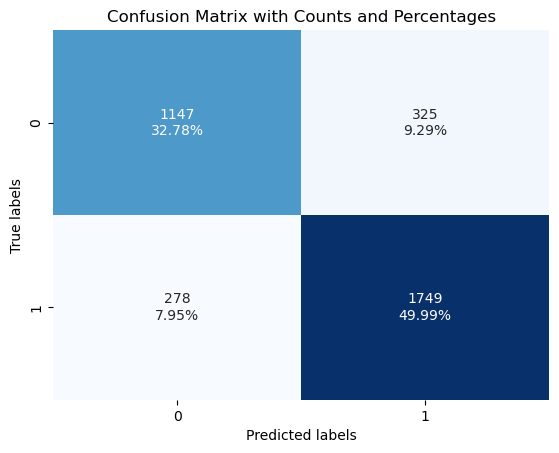

In [11]:
# Import the TfidfVectorizer and default list of English stop words, processing and modeling modules
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Build the vectorizer
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.user_review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.user_review)

# Create a DataFrame from tf-idf frequencies and tokens
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print(reviews_transformed.shape)

reviews_transformed['user_suggestion'] = reviews.user_suggestion
# Define X and y
y = reviews_transformed.user_suggestion
X = reviews_transformed.drop('user_suggestion', axis=1)

# Train/test split review dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression model
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels for the test set
y_predicted = log_reg.predict(X_test)
# Calculate the confusion matrix to see distribution of predicted labels (correct along diagonal, incorrect off-diagonal)
cf_matrix = confusion_matrix(y_test, y_predicted)
# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(cf_matrix)
# Visualise confusion matrix using function defined above
plot_confusion_matrix(cf_matrix)

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1472
           1       0.84      0.86      0.85      2027

    accuracy                           0.83      3499
   macro avg       0.82      0.82      0.82      3499
weighted avg       0.83      0.83      0.83      3499



## Optmizing the Model using GridSearchCV


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline combining a text feature extractor with a simple logistic regression classifier. The token_pattern matches latin alphabet words containing 3 or more letters to filter out unwanted reviews
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{3,}\b')),
    ('clf', LogisticRegression())
])

# Define the parameter grid to search: unigrams or bigrams | max number of features (tokens/words or bigrams)
parameter_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [2000, 5000, 10000, 20000]
}

# Setup the grid search using the pipeline and the parameter grid
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, n_jobs=-1, verbose=4)

# Perform the grid search on the user reviews
grid_search.fit(reviews.user_review, reviews.user_suggestion)
# Print the best parameters and the corresponding score
print("Best parameters set:")
print(grid_search.best_params_)
print("Best score: %0.3f" % grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set:
{'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 2)}
Best score: 0.788


## Improved Model Performance


TfidfVectorizer(max_features=20000, ngram_range=(1, 2), stop_words='english',
                token_pattern='\\b[a-zA-Z]{3,}\\b')
Accuracy on the test set:  0.85
[[1182  290]
 [ 232 1795]]


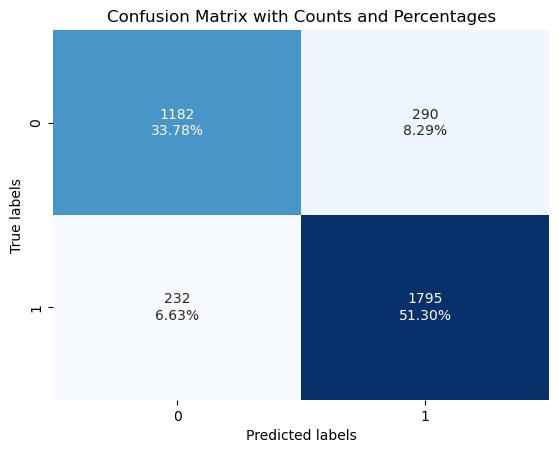

In [14]:
# Select the best tfidf estimator from the grid search
best_tfidf = grid_search.best_estimator_.named_steps['tfidf']
print(best_tfidf)
# Transform reviews.user_review using the best tfidf estimator
transformed_reviews = best_tfidf.transform(reviews.user_review)

# Create a dataframe using the output in array form, and add the feature names as columns
df_transformed_reviews = pd.DataFrame(transformed_reviews.toarray(), columns=best_tfidf.get_feature_names_out())
df_transformed_reviews['user_suggestion'] = reviews.user_suggestion

y_grid = df_transformed_reviews.user_suggestion
X_grid = df_transformed_reviews.drop('user_suggestion', axis=1)

# Train/test split
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid, test_size=0.2, random_state=123)

# Train a logistic regression
log_reg_grid = LogisticRegression().fit(X_train_grid, y_train_grid)
# Predict the labels
y_pred_grid = log_reg_grid.predict(X_test_grid)
cf_matrix_grid = confusion_matrix(y_test_grid, y_pred_grid)
# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test_grid, y_pred_grid).round(2))
print(cf_matrix_grid)
plot_confusion_matrix(cf_matrix_grid)


In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test_grid, y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1472
           1       0.86      0.89      0.87      2027

    accuracy                           0.85      3499
   macro avg       0.85      0.84      0.85      3499
weighted avg       0.85      0.85      0.85      3499



## Visualizing the Most Common Words: WordCloud

game      1182.937354
play       449.666760
like       434.514715
just       387.180242
good       345.250717
fun        341.993912
time       314.071080
really     290.269503
free       277.965495
games      262.438764
dtype: float64

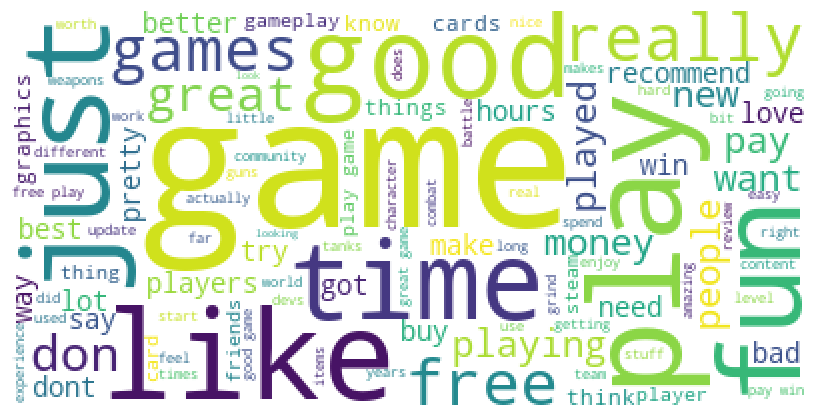

In [16]:
from wordcloud import WordCloud
# Transpose tfidf word frequencies and sum them up to find most common words across all reviews
word_freqs = X_grid.T.sum(axis=1)
display(word_freqs.sort_values(ascending=False).head(10))
# Generate word cloud of most common words and plot
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(word_freqs)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [17]:
# Have a glance at a sample review in full-form and the resulting tokenized features
print(reviews.loc[0, 'user_review'])
df_transformed_reviews.loc[0, df_transformed_reviews.loc[0, :] > 0].iloc[:100]

I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.


adorable           0.149722
afraid             0.134646
atleast            0.117990
beat               0.108511
bit                0.072418
bit odd            0.174185
chasing            0.146017
childhood          0.146017
children           0.132798
class              0.087162
clean              0.135302
creepy             0.431629
dead               0.102400
did                0.074648
door               0.129540
finding            0.116484
flashlight         0.147178
friends            0.070893
game               0.046377
game adorable      0.176579
ghosts             0.156024
graphics           0.067821
happy              0.104777
hearing            0.144918
heart              0.117292
hello              0.132798
hmm                0.161263
kill               0.079513
lets               0.103208
like               0.039280
locked             0.110573
look               0.074564
moment             0.102008
music              0.110279
noob               0.123694
odd                0

## Inspecting the wrongly classified reviews

In [18]:
# Create a DataFrame with test reviews and their actual and predicted recommendations
test_reviews_with_predictions = X_test_grid.copy()
test_reviews_with_predictions['Actual'] = y_test_grid
test_reviews_with_predictions['Predicted'] = y_pred_grid

# Filter out the incorrectly predicted reviews
incorrect_predictions = test_reviews_with_predictions[test_reviews_with_predictions['Actual'] != test_reviews_with_predictions['Predicted']]

# Merge the incorrect predictions with the original reviews DataFrame to get the full text
incorrect_reviews_full = incorrect_predictions.merge(reviews, left_index=True, right_index=True, how='left')

# Display the first few rows of the DataFrame containing the full text of incorrectly predicted reviews
incorrect_reviews_full[['user_review', 'Actual', 'Predicted']]

,user_review,Actual,Predicted
9579,(Disregard however many hours steam says i hav...,0,1
12494,I love cars and 3D racing games and this game ...,1,0
14455,"This game ranks you up too fast, basicly if yo...",0,1
4857,Used to be a fun game with friendly community....,0,1
4787,Saw a troll face emblem for an unusual gem pri...,1,0
...,...,...,...
7715,Very addicting game. The only thing I find is ...,1,0
8307,"Its a fun run of the mill mmo, slash'em up gam...",0,1
7972,You can't almost get any good gear in this gam...,0,1
13163,"Graphics/maps/textures prety nice, meniu optio...",1,0


## Sentiment Analysis of the Reviews
Until now, the analysis of reviews and resulting model have relied upon the frequency of terms across the pool of reviews. However, it is also interesting to look into any possible correlation between the sentiment polarity of a review and a user's willingness to recommend a game. Sentiment polarity is a measure of the emotional tone of a piece of text, indicating whether the sentiment is positive, negative, or neutral.

In [19]:
import pandas as pd
from textblob import TextBlob

# Make a copy of the reviews dataframe
reviews_copy = reviews.copy()

# Function to calculate polarity of reviews
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'user_review' column and create a new column for polarity in the copied dataframe
reviews_copy['polarity'] = reviews_copy['user_review'].apply(calculate_polarity)

Sentiment polarity is categorized as follows: negative (< 0), neutral (= 0) and positive (> 0).

In [20]:
import plotly.figure_factory as ff

# Filter reviews by user_suggestion type
suggestion_0 = reviews_copy[reviews_copy['user_suggestion'] == 0]['polarity']
suggestion_1 = reviews_copy[reviews_copy['user_suggestion'] == 1]['polarity']

# Create distplot with custom bin_size
fig = ff.create_distplot([suggestion_0, suggestion_1], 
                         ['Not Recommended', 'Recommended'], 
                         bin_size=.05, 
                         curve_type='kde', 
                         colors=['red', 'blue'],
                         show_rug=True)

# Update layout
fig.update_layout(title='Polarity Distribution by User Suggestion Type',
                  xaxis_title='Polarity',
                  yaxis_title='Density')

fig.show()

This code prints the counts of user suggestions (recommendations) and non-suggestions (non-recommendations) in the reviews dataset.

In [21]:
# Counts of suggestion or not
print(reviews_copy['user_suggestion'].value_counts())
# Calculate the number of reviews with positive polarity that yield a user suggestion (user_suggestion == 1)
positive_reviews_with_suggestion = reviews_copy[(reviews_copy['polarity'] > 0) & (reviews_copy['user_suggestion'] == 1)].shape[0]

# Calculate the number of reviews with negative polarity that yield 0 user suggestion (user_suggestion == 0)
negative_reviews_without_suggestion = reviews_copy[(reviews_copy['polarity'] <= 0) & (reviews_copy['user_suggestion'] == 0)].shape[0]

# Positive sentiment polarity reviews yielding suggestions (similar to an accuracy score)
print(f"Positive sentiment polarity predicts {positive_reviews_with_suggestion} user suggestions out of {reviews_copy['user_suggestion'].value_counts()[1]} -> {(positive_reviews_with_suggestion/reviews_copy['user_suggestion'].value_counts()[1]*100).round(2)}%")
# Negative (also neutral reviews without suggestion so skewed in terms of proportion) polarity reviews that did not yield a suggestion
print(f"Negative/Neutral sentiment polarity predicts {negative_reviews_without_suggestion} user suggestions out of {reviews_copy['user_suggestion'].value_counts()[0]} -> {(negative_reviews_without_suggestion/reviews_copy['user_suggestion'].value_counts()[0]*100).round(2)}%")
# Print some of the wrongly classified reviews based on sentiment polarity (recommended with negative/neutral polarity)
reviews_copy[(reviews_copy['polarity'] <= 0) & (reviews_copy['user_suggestion'] == 1)]

user_suggestion
1    9968
0    7526
Name: count, dtype: int64
Positive sentiment polarity predicts 7849 user suggestions out of 9968 -> 78.74%
Negative/Neutral sentiment polarity predicts 4162 user suggestions out of 7526 -> 55.3%


,review_id,title,year,user_review,user_suggestion,polarity
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,-0.028125
11,12,Spooky's Jump Scare Mansion,2015.0,"Green ghosty goo thing chases me, not that sca...",1,-0.275000
12,13,Spooky's Jump Scare Mansion,2015.0,"Rooms 1-20 were cute and adorable, but DONT LE...",1,-0.031111
13,14,Spooky's Jump Scare Mansion,2015.0,Great game. It always has you running paniced...,1,-0.042857
15,16,Spooky's Jump Scare Mansion,2016.0,Never would have thought something so adorably...,1,-0.055556
...,...,...,...,...,...,...
17452,25498,EverQuest II,2016.0,started playing this game with nothing but a f...,1,-0.087691
17460,25506,EverQuest II,2014.0,"Nice gameplay, nice storyline, interesting que...",1,-0.013596
17467,25513,EverQuest II,2011.0,An acceptable way to spend your time if you're...,1,-0.124306
17482,25528,EverQuest II,2012.0,This is why steam needs a neutral review optio...,1,-0.096429


# Test Set Analysis
## Load, Clean & Investigate Data

In [22]:
# Load the test reviews dataset
test = pd.read_csv('datasets/test.csv')

# Strip "Early Access Review" from the user_review column
test['user_review'] = test['user_review'].str.replace("Early Access Review", "", regex=False)
reviews['user_review'] = reviews['user_review'].str.replace("Product received for free", "", regex=False)

# Display the first 5 rows of dataframe
display(test.head(),test.shape)
# Count the number of unique titles in the test dataframe
test_titles = test['title'].nunique()
print(test['title'].value_counts())
# Display the count with a message
print(f"Number of unique titles in the reviews dataframe: {test_titles}")

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


(8045, 4)

title
Magic Duels                         893
Tree of Savior (English Ver.)       635
Star Trek Online                    566
Dungeon Defenders II                554
Paladins®                           529
Fishing Planet                      498
Counter-Strike: Global Offensive    463
Shadowverse CCG                     450
The Lord of the Rings Online™       439
H1Z1                                425
Minion Masters                      401
Champions Online                    383
World of Warships                   366
Crush Crush                         333
Aura Kingdom                        324
Digimon Masters Online              310
VEGA Conflict                       173
Shakes and Fidget                   137
Governor of Poker 3                  89
GUNS UP!                             77
Name: count, dtype: int64
Number of unique titles in the reviews dataframe: 20


## Predicting User Suggestion in Test Set
transform the new data using the TF-IDF model established using above for the training set.

In [23]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression

# Transform test set according to the tfidf model (vect) defined using the training set of reviews
test_set = best_tfidf.transform(test.user_review)

# Create a DataFrame
test_transformed = pd.DataFrame(test_set.toarray(), columns=best_tfidf.get_feature_names_out())
print(test_transformed.shape)

# Predict the labels
y_pred_test = log_reg_grid.predict(test_transformed)
test_positive = y_pred_test.sum()
print(f"The model predicts {test_positive} user suggestions, leaving {len(test_transformed) - test_positive} users without suggestion. This is a positive suggestion rate of {(test_positive/len(test_transformed)*100).round(2)}%.")
test['user_suggestion_pred'] = y_pred_test
test.head()

(8045, 20000)
The model predicts 4734 user suggestions, leaving 3311 users without suggestion. This is a positive suggestion rate of 58.84%.


,review_id,title,year,user_review,user_suggestion_pred
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B...",0
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...,0
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...,0
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...,0
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...,1


## Visualizing Most Common Words in Test Set: WordCloud

game      549.878708
play      231.423365
like      197.072634
just      186.773104
cards     159.256164
good      156.451884
time      154.709807
fun       144.943782
really    135.461539
free      132.079125
dtype: float64

game      1182.937354
play       449.666760
like       434.514715
just       387.180242
good       345.250717
fun        341.993912
time       314.071080
really     290.269503
free       277.965495
games      262.438764
dtype: float64

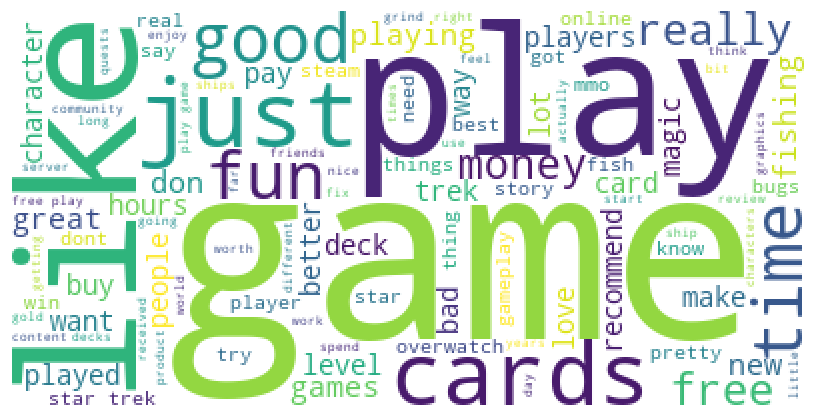

In [25]:
from wordcloud import WordCloud
# Transpose tfidf word frequencies and sum them up to find most common words across all reviews
word_freqs_test = test_transformed.T.sum(axis=1)
# Display most common words in the test set and then also display most common words from training set for comparison (9 of the top 10 words are the same!)
display(word_freqs_test.sort_values(ascending=False).head(10))
display(word_freqs.sort_values(ascending=False).head(10))
# Generate word cloud of most common words and plot
wordcloud_test = WordCloud(background_color="white", max_words=100).generate_from_frequencies(word_freqs_test)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_test)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Sentiment Analysis of the Test Set

In [26]:
# Make a copy of the reviews dataframe
test_copy = test.copy()

# Apply the function to the 'user_review' column and create a new column for polarity in the copied dataframe
test_copy['polarity'] = test_copy['user_review'].apply(calculate_polarity)
test_copy.head(5)

,review_id,title,year,user_review,user_suggestion_pred,polarity
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B...",0,0.239394
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...,0,-0.204293
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...,0,0.023715
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...,0,-0.067803
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...,1,0.006981


Sentiment polarity is categorized as follows: negative (< 0), neutral (= 0) and positive (> 0).

In [27]:
import plotly.figure_factory as ff

# Filter reviews by user_suggestion_pred type
suggestion_0 = test_copy[test_copy['user_suggestion_pred'] == 0]['polarity']
suggestion_1 = test_copy[test_copy['user_suggestion_pred'] == 1]['polarity']

# Create distplot with custom bin_size
fig = ff.create_distplot([suggestion_0, suggestion_1], 
                         ['Not Recommended', 'Recommended'], 
                         bin_size=.05, 
                         curve_type='kde', 
                         colors=['red', 'blue'],
                         show_rug=True)

# Update layout
fig.update_layout(title='Polarity Distribution by User Suggestion Prediction Type',
                  xaxis_title='Polarity',
                  yaxis_title='Density')

fig.show()

In [28]:
# Counts of suggestion or not
print(test_copy['user_suggestion_pred'].value_counts())
# Calculate the number of reviews with positive polarity that yield a user suggestion (user_suggestion_pred == 1)
positive_reviews_with_suggestion = test_copy[(test_copy['polarity'] > 0) & (test_copy['user_suggestion_pred'] == 1)].shape[0]

# Calculate the number of reviews with negative polarity that yield 0 user suggestion (user_suggestion_pred == 0)
negative_reviews_without_suggestion = test_copy[(test_copy['polarity'] <= 0) & (test_copy['user_suggestion_pred'] == 0)].shape[0]

# Positive sentiment polarity reviews yielding suggestions (similar to an accuracy score)
print(f"Positive sentiment polarity predicts {positive_reviews_with_suggestion} user suggestions out of the {test_copy['user_suggestion_pred'].value_counts()[1]} suggestions predicted by the model -> {(positive_reviews_with_suggestion/test_copy['user_suggestion_pred'].value_counts()[1]*100).round(2)}%")
# Negative (also neutral reviews without suggestion so skewed in terms of proportion) polarity reviews that did not yield a suggestion
print(f"Negative/Neutral sentiment polarity predicts {negative_reviews_without_suggestion} user suggestions out of the {test_copy['user_suggestion_pred'].value_counts()[0]} suggestions predicted by the model -> {(negative_reviews_without_suggestion/test_copy['user_suggestion_pred'].value_counts()[0]*100).round(2)}%")

user_suggestion_pred
1    4734
0    3311
Name: count, dtype: int64
Positive sentiment polarity predicts 3812 user suggestions out of the 4734 suggestions predicted by the model -> 80.52%
Negative/Neutral sentiment polarity predicts 1889 user suggestions out of the 3311 suggestions predicted by the model -> 57.05%


## Sanity Check of Predicted Results
To ensure the validity of the predicted outcomes without access to the actual user suggestion data for the test dataset, a further verification step is performed by retrieving recommendation data directly from Steam's user review API, providing a baseline understanding of anticipated recommendation levels for the games under consideration.

The first step to this end is to extract all the Steam game ID's for the games in the dataset.

In [29]:
# Grab game titles from test set
game_titles_list = test['title'].unique().tolist()
# Steam game ID's for each game
id_list = [730, 552990, 9900, 444090, 453480, 372000, 339600, 489520, 212500, 380600, 459820, 236110, 436150, 537180, 438040, 9880, 316010, 268420, 433850, 446150]
# Make a dictionary of game titles and game ID's
game_title_id_dict = dict(zip(game_titles_list, id_list))
game_title_id_dict

{'Counter-Strike: Global Offensive': 730,
 'World of Warships': 552990,
 'Star Trek Online': 9900,
 'Paladins®': 444090,
 'Shadowverse CCG': 453480,
 'Tree of Savior (English Ver.)': 372000,
 'VEGA Conflict': 339600,
 'Minion Masters': 489520,
 'The Lord of the Rings Online™': 212500,
 'Fishing Planet': 380600,
 'Crush Crush': 459820,
 'Dungeon Defenders II': 236110,
 'Governor of Poker 3': 436150,
 'Digimon Masters Online': 537180,
 'Shakes and Fidget': 438040,
 'Champions Online': 9880,
 'Magic Duels': 316010,
 'Aura Kingdom': 268420,
 'H1Z1': 433850,
 'GUNS UP!': 446150}

In [30]:
import pandas as pd
import requests

def fetch_game_reviews_stats(game_id):
    # URL of the API endpoint, formatted to include the game_id
    url = f"https://store.steampowered.com/appreviewhistogram/{game_id}?l=english"

    # Make a GET request to fetch the data from the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        data = response.json()
        
        # Assuming we are interested in the 'reviews' part of the data
        # and it is structured in a way that can be directly converted to a DataFrame
        reviews_data = data['results']
        
        # Convert the data into a DataFrame
        reviews_df = pd.DataFrame([reviews_data])
        
        # Selecting dates before 1543622400 (before 01 Dec 2018)
        rollups_df = reviews_df['rollups'].iloc[0]
        filtered_rollups_df = pd.DataFrame(rollups_df)
        filtered_rollups_df = filtered_rollups_df[filtered_rollups_df['date'] < 1543622400]

        # Calculating the totals of recommendations up and down for the selection
        total_recommendations_up = filtered_rollups_df['recommendations_up'].sum()
        total_recommendations_down = filtered_rollups_df['recommendations_down'].sum()

        # Calculating the ratio of up to down recommendations
        ratio_up_to_down = total_recommendations_up / (total_recommendations_up + total_recommendations_down)
        
        return total_recommendations_up, total_recommendations_down, ratio_up_to_down
    else:
        print("Failed to fetch data from the API. Status code:", response.status_code)
        return pd.DataFrame()  # Return an empty DataFrame in case of failure

First, calculate the positive suggestion rate by taking the mean of all extracted positive suggestion rates extracted from the API data.

In [31]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Iterate over each game title and its corresponding game_id in the dictionary
for title, game_id in game_title_id_dict.items():
    # Fetch the review stats for the current game_id
    up_total, down_total, ratio_up = fetch_game_reviews_stats(game_id)
    
    # Add the game title, game_id, and processed review stats to the results list
    results.append({
        "Game Title": title,
        "Game ID": game_id,
        "Up Total": up_total,
        "Down Total": down_total,
        "Ratio Up/Down": ratio_up
    })

# Convert the results list to a DataFrame
df = pd.DataFrame(results)

# Calculate the average of the ratio column
average_ratio = df["Ratio Up/Down"].mean()

# Print the average of the ratio column with some text
print(f"The average ratio of positive suggestion rate votes across all games is: {(average_ratio*100).round(2)}%.")

# Display the DataFrame
df

The average ratio of positive suggestion rate votes across all games is: 75.55%.


C:\Users\chris\AppData\Local\Temp\ipykernel_18908\749959377.py:33: RuntimeWarning:

invalid value encountered in scalar divide



,Game Title,Game ID,Up Total,Down Total,Ratio Up/Down
0,Counter-Strike: Global Offensive,730,2344547,309459,0.883399
1,World of Warships,552990,6809,2417,0.738023
2,Star Trek Online,9900,7142,2114,0.771608
3,Paladins®,444090,147387,26313,0.848515
4,Shadowverse CCG,453480,4979,1708,0.744579
5,Tree of Savior (English Ver.),372000,8845,5516,0.615904
6,VEGA Conflict,339600,1361,1232,0.524875
7,Minion Masters,489520,5538,1052,0.840364
8,The Lord of the Rings Online™,212500,6385,1427,0.817332
9,Fishing Planet,380600,9582,2966,0.763628


The ratio of positive to negative recommendations provides an insight into the proportion of positive recommendations expected for a set of reviews for a given game, much like a sample compared to a population (this being the population and the dataset, a sample). In the standard mean calculation above, the spread of user reviews per game is not taken into account. This could lead to skewed results for a larger number of games that are either very positively or negatively rated. 

To fix this issue, the calculated positive suggestion ratio should be adjusted to include the proportion of games that make up the dataset; the Up/Down ratios for each game should be weighted depending on the number of reviews for that game in the dataset. These weighted ratios can then be used to calculate a weighted average of expected positive recommendations which better represents the test dataset in question.

Indeed, the resulting weighted positive suggestion rate is calculated to be 58.66%, which is much closer to the value (58.84%) based on the predictions of the model compared to the standard mean calculation of 75.55%.

In [32]:
up_pred_rate = (test_copy['user_suggestion_pred'].value_counts()[1]/len(test_copy)*100).round(2)
# Calculate the weights of each game proportionally to the set
weights = test['title'].value_counts()/len(test)
print(weights)
# Adjust the lambda function to also divide by the sum of weights
df['Weighted Ratio Up/Down'] = df.apply(lambda row: (row['Ratio Up/Down'] * weights[row['Game Title']]) if row['Game Title'] in weights.index else row['Ratio Up/Down'], axis=1)

# Add a column that multiplies Ratio Up/Down by Weighted Ratio Up/Down
df['Multiplied Ratios'] = df['Ratio Up/Down'] * df['Weighted Ratio Up/Down']

# Print the sum of the resulting column
sum_multiplied_ratios = (df['Multiplied Ratios'].sum()*100).round(2)
print(f'The overall, weighted suggestion/recommendation rate for the games in the test set is thus: {sum_multiplied_ratios}%.')
print(f'This value is much more in line with the rate calculated from our predictive model: {up_pred_rate}%.')
df

title
Magic Duels                         0.111001
Tree of Savior (English Ver.)       0.078931
Star Trek Online                    0.070354
Dungeon Defenders II                0.068863
Paladins®                           0.065755
Fishing Planet                      0.061902
Counter-Strike: Global Offensive    0.057551
Shadowverse CCG                     0.055935
The Lord of the Rings Online™       0.054568
H1Z1                                0.052828
Minion Masters                      0.049845
Champions Online                    0.047607
World of Warships                   0.045494
Crush Crush                         0.041392
Aura Kingdom                        0.040273
Digimon Masters Online              0.038533
VEGA Conflict                       0.021504
Shakes and Fidget                   0.017029
Governor of Poker 3                 0.011063
GUNS UP!                            0.009571
Name: count, dtype: float64
The overall, weighted suggestion/recommendation rate for the games

,Game Title,Game ID,Up Total,Down Total,Ratio Up/Down,Weighted Ratio Up/Down,Multiplied Ratios
0,Counter-Strike: Global Offensive,730,2344547,309459,0.883399,0.050841,0.044913
1,World of Warships,552990,6809,2417,0.738023,0.033576,0.024780
2,Star Trek Online,9900,7142,2114,0.771608,0.054286,0.041887
3,Paladins®,444090,147387,26313,0.848515,0.055794,0.047342
4,Shadowverse CCG,453480,4979,1708,0.744579,0.041648,0.031010
5,Tree of Savior (English Ver.),372000,8845,5516,0.615904,0.048614,0.029942
6,VEGA Conflict,339600,1361,1232,0.524875,0.011287,0.005924
7,Minion Masters,489520,5538,1052,0.840364,0.041888,0.035201
8,The Lord of the Rings Online™,212500,6385,1427,0.817332,0.044600,0.036453
9,Fishing Planet,380600,9582,2966,0.763628,0.047270,0.036097


In [34]:
%pip install dataframe-image

  Obtaining dependency information for dataframe-image from https://files.pythonhosted.org/packages/ef/40/9e8d11ae1eb3884c6a8c150d7c7aec63079078b59cbf23581e9a156ce462/dataframe_image-0.2.3-py3-none-any.whl.metadata
  Using cached dataframe_image-0.2.3-py3-none-any.whl.metadata (8.9 kB)
  Obtaining dependency information for cssutils from https://files.pythonhosted.org/packages/97/08/70f6d03c4e14a85e1efd425689971826b4024c0547b0c063168920e49a37/cssutils-2.10.2-py3-none-any.whl.metadata
  Obtaining dependency information for html2image from https://files.pythonhosted.org/packages/89/b9/1dc02a535c71ceed5b71bd0f82e5d31fba100b59d43a35d5c40d836a8525/html2image-2.0.4.3-py3-none-any.whl.metadata
  Using cached html2image-2.0.4.3-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for websocket-client<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/5a/84/44687a29792a70e111c5c477230a72c4b957d88d16141199bf9acb7537a3/websocket_client-1.8.0-py3-none-any.whl.metadata
Using

In [37]:
import dataframe_image as dfi
dfi.export(df, 'steamreviewcomparison.png')

dfi.export(game_overview.head(), 'gameoverview.png')